# Numpy

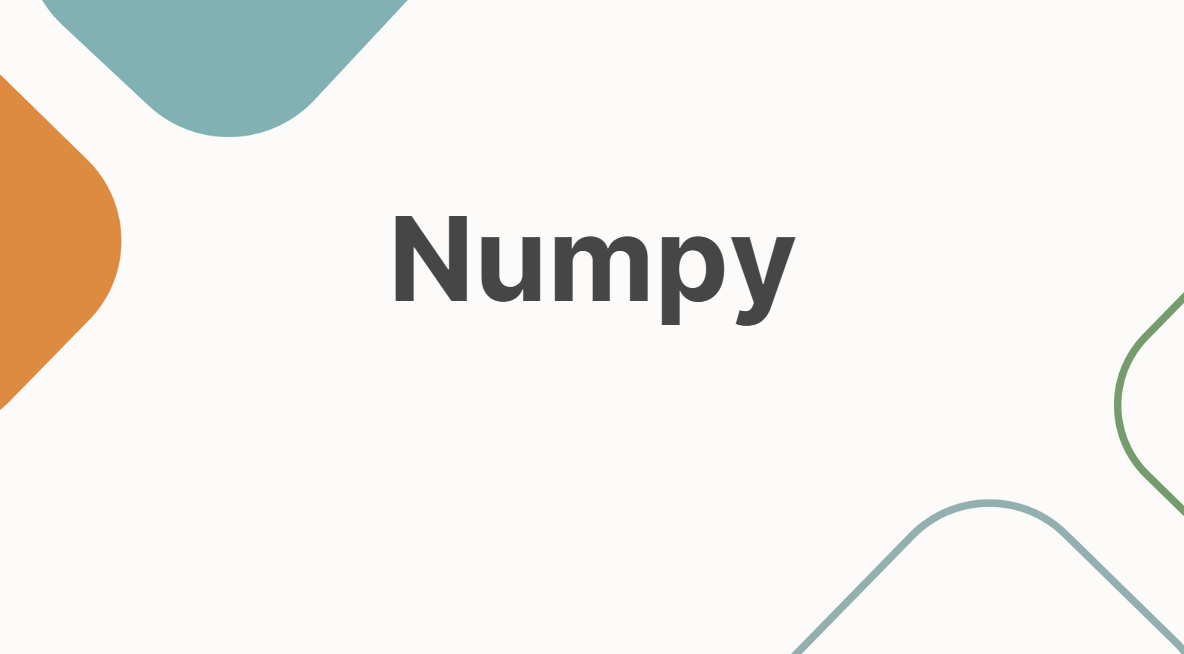

Array:

* Guarda dados todos do mesmo tipo (por exemplo, apenas inteiros ou apenas floats).

* É otimizado para operações rápidas e vetorizadas.

* Consome menos memória do que uma lista para a mesma quantidade de dados.

* Permite operações matemáticas diretas sem usar loops explícitos.

In [2]:
import numpy as np

In [3]:
array = np.array([10, 20, 30, 40, 50])

In [4]:
# Lista com 1 milhão de elementos
lista = list(range(1_000_000))

# Multiplicando cada elemento por 2 com um loop
resultado = []
for numero in lista: resultado.append(numero * 2)

In [5]:
# Array de 1 milhão de elementos
array = np.arange(1_000_000)

# Multiplicando todos os elementos por 2 de forma vetorizada
resultado = array * 2

Por exemplo, se você tiver o vetor 𝑣 ⃗ = [ 1 , 2 , 3, ... ] e o multiplicar por 2, o resultado é [ 2 , 4 , 6, ... ].

🧮 Funções comuns do NumPy para análise e transformação numérica:

* np.array(): Cria um array NumPy a partir de listas ou tuplas.
* np.arange(): Gera uma sequência de números com um passo definido.
* np.linspace(): Cria um array com valores equidistantes entre dois limites.
* np.zeros((linhas, colunas)): Gera um array preenchido com zeros.
* np.ones((linhas, colunas)): Gera um array preenchido com uns.
* np.eye(n): Cria uma matriz identidade de tamanho n x n.
* np.reshape(array, nova_forma): Muda a forma do array sem alterar seus dados.
* np.sum(array, axis=...): Calcula a soma dos elementos.
* np.mean(array): Calcula a média dos valores.
* np.std(array): Calcula o desvio padrão.
* np.max(array) / np.min(array): Encontra o valor máximo ou mínimo.
* np.dot(a, b) ou a @ b: Realiza multiplicação de matrizes.
* np.concatenate([a, b], axis=...): Junta arrays em uma dimensão específica.
* np.stack([a, b]): Empilha arrays criando uma nova dimensão.
* array[a > valor]: Filtra elementos usando condições booleanas.
* array.astype(tipo): Converte o tipo de dados do array (por exemplo, de float para int).

# 🚗 O Dilema da Agência de Carros do Sul

Há alguns anos, a Agência de Carros do Sul, uma concessionária tradicional na América Latina, começou a digitalizar seus processos. Por muito tempo, seus registros de vendas eram guardados em planilhas antigas, formulários incompletos e até mesmo em cadernos escritos à mão.

Com a chegada da concorrência digital e o aumento do comércio eletrônico, o gerente decidiu agir. Ele exportou todos os dados históricos para um arquivo .csv... mas o resultado não foi tão perfeito.

📉 O arquivo está cheio de problemas:

Dados ausentes em várias colunas importantes,
Registros incompletos,
Inconsistências que dificultam qualquer análise.
🎯 Sua missão hoje é assumir o papel de analista de dados e ajudar esta agência a transformar este arquivo bruto em um conjunto limpo, confiável e pronto para análise.

Utilizaremos Pandas para explorar e ler os dados, e aplicaremos NumPy para fazer transformações avançadas, como:

Identificar valores perdidos/ausentes,
Substituir dados ausentes de forma inteligente,
Limpar registros inúteis e reconstruir o conjunto.
Este exercício faz parte do processo ETL — especialmente a etapa de Transformação — e te ajudará a compreender como usar NumPy e Pandas de maneira conjunta para resolver problemas do mundo real.

🔹 0. Importação e leitura de dados

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("car-sales-extended-missing-data.csv")
df


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


🔹 1. Exploração geral do conjunto de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB




 📘 Dicionario de Dados

| Coluna         | Tipo de Dado | Tradução            | Descrição                                              |
| --------------- | ------------ | --------------------- | --------------------------------------------------------- |
| `Make`          | `object`     | **Marca**             | Marca do automóvel (por exemplo, Toyota, Ford, etc.).    |
| `Colour`        | `object`     | **Cor**             | Cor do automóvel. Pode haver valores perdidos (NaN).  |
| `Odometer (KM)` | `float64`    | **Odômetro (KM)**     | Distância total percorrida pelo veículo, em quilômetros. |
| `Doors`         | `float64`    | **Número de portas** | Quantidade de portas do veículo.                         |
| `Price`         | `float64`    | **Preço**            | Preço de venta do veículo em moeda local.             |




In [9]:
#contagem de valore nulos
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

🔹2. Extração de colunas como arrays NumPy

In [10]:
odometro_np = df['Odometer (KM)'].to_numpy()
preco_np = df['Price'].to_numpy()

Ao converter colunas para arrays NumPy, ganhamos flexibilidade para aplicar funções matemáticas de forma eficiente.



🔹 3. Detecção e substituição de valores ausentes com NumPy

In [11]:
np.isnan(odometro_np)

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [12]:
media_odometro = np.nanmean(odometro_np)
media_odometro

np.float64(131253.23789473684)

In [13]:
odometro_limpo = np.where(np.isnan(odometro_np), media_odometro, odometro_np)
odometro_limpo

array([ 35431.        , 192714.        ,  84714.        , 154365.        ,
       181577.        ,  42652.        , 163453.        , 131253.23789474,
       130538.        ,  51029.        , 167421.        ,  17119.        ,
       102303.        , 134181.        , 199833.        , 205592.        ,
        96742.        , 194189.        ,  67991.        , 215820.        ,
       124844.        ,  30615.        , 148744.        , 130075.        ,
       172718.        , 125819.        , 180390.        ,  82783.        ,
        56687.        , 112004.        ,  34024.        , 108569.        ,
       203795.        , 153554.        ,  71949.        , 191622.        ,
        38186.        , 131253.23789474, 146430.        , 109868.        ,
       177894.        , 189209.        , 200490.        , 141617.        ,
       213893.        , 231057.        , 100938.        , 243969.        ,
       107096.        ,  86333.        , 184878.        , 161068.        ,
        77646.        , 2

Aqui aplicamos uma imputação simples usando NumPy: substituímos os valores ausentes pela média. É rápido, eficiente e sem loops.

📌 Imputação de valores ausentes (NaN)

A imputação é o processo de preencher dados ausentes em um conjunto de dados. Isso é importante porque muitos algoritmos não conseguem processar valores nulos, e eliminar dados pode nos fazer perder informações valiosas.

✅ Métodos comuns:

Média / Mediana / Moda: Para dados numéricos ou categóricos simples.
Condicional: Usar médias de acordo com grupos (ex: preço médio por marca).
Modelos preditivos: Usar KNN ou regressão para estimar valores.
Eliminação: Apenas se houver muitos dados ausentes.
Imputar permite manter a qualidade da análise sem descartar registros úteis.

🔹 4. Manipulação de colunas de texto com NumPy

In [14]:
color_np = df["Colour"].to_numpy(dtype="object")
color_np[np.where(pd.isna(color_np))] = "Desconhecido"
color_np

array(['White', 'Blue', 'White', 'White', 'Blue', 'Red', 'Blue', 'White',
       'White', 'Blue', 'White', 'Green', 'White', 'White', 'Blue',
       'Blue', 'Red', 'White', 'White', 'Blue', 'Desconhecido',
       'Desconhecido', 'White', 'Green', 'Blue', 'Blue', 'White', 'Green',
       'White', 'White', 'Blue', 'White', 'White', 'Green', 'Blue',
       'Blue', 'Blue', 'White', 'Blue', 'Green', 'White', 'Blue', 'Black',
       'Blue', 'Blue', 'Blue', 'White', 'Blue', 'White', 'Black', 'Red',
       'White', 'Blue', 'Blue', 'White', 'White', 'White', 'Red',
       'Desconhecido', 'Blue', 'Red', 'Black', 'Green', 'Green', 'White',
       'White', 'Blue', 'Black', 'Blue', 'White', 'White', 'Desconhecido',
       'White', 'Red', 'Blue', 'Blue', 'Blue', 'White', 'Blue', 'Blue',
       'Black', 'Blue', 'Blue', 'Blue', 'Green', 'Blue', 'Blue',
       'Desconhecido', 'Red', 'Blue', 'White', 'White', 'White', 'White',
       'Green', 'Blue', 'Blue', 'Black', 'Red', 'Desconhecido', 'Blue',
     

Embora estejamos lidando com texto, também podemos usar NumPy. Aqui substituímos valores nulos por "Desconhecido".

🔹 5. Filtragem de linhas com muitos dados ausentes

In [15]:
matriz_nan = pd.isna(df).copy()

matriz_nan = matriz_nan.to_numpy()
matriz_nan

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [16]:
nan_por_fila = matriz_nan.sum( axis=1)
nan_por_fila

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [17]:
filas_validas = nan_por_fila < (df.shape[1] / 2)

filas_validas

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Quando uma linha está muito incompleta, pode ser melhor descartá-la. Aqui usamos uma regra: manter apenas as linhas que têm pelo menos metade dos dados completos.

🔹 6. Reconstrução do DataFrame limpo

In [18]:
df_limpo = df[filas_validas].copy()

In [19]:
df_limpo['Odometer (KM)'] = odometro_limpo[filas_validas]
df_limpo['Colour'] = color_np[filas_validas]

In [20]:
df_limpo['Price'] = np.where(np.isnan(preco_np),0,preco_np)[filas_validas]

In [21]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         999 non-null    object 
 2   Odometer (KM)  999 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          999 non-null    float64
dtypes: float64(3), object(2)
memory usage: 46.8+ KB


In [22]:
df.isna().sum()

Make             49
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [23]:
df_limpo.isna().sum()

Make             48
Colour            0
Odometer (KM)     0
Doors            49
Price             0
dtype: int64

🤔 Por que estamos usando NumPy e não Pandas? Embora Pandas seja uma ferramenta mais prática para lidar com dados, nesta aula escolhemos usar NumPy para fortalecer a compreensão dos fundamentos da manipulação de dados numéricos.

✅ Por que aprender com NumPy?

NumPy é a base do Pandas: tudo o que o Pandas faz por baixo dos panos, ele faz com arrays NumPy.
Mais controle sobre os dados: ao usar NumPy, trabalhamos diretamente com strings, valores ausentes, conversão de tipos e normalização de dados.
É essencial para ML e ciência de dados: bibliotecas como Scikit-learn e TensorFlow usam NumPy diretamente.
Treinamento do raciocínio analítico: ao tratar os dados passo a passo com NumPy, entendemos como os dados são realmente processados.
👨‍🏫 Nosso objetivo aqui: "Entender o que acontece nos bastidores para depois usar ferramentas mais poderosas com consciência."

Mais adiante, você verá como resolver o mesmo problema com Pandas em poucas linhas... mas agora saberá o que acontece por trás dessas linhas 😉